# KNN

## KNN例子

In [1]:
import pandas as pd

In [2]:
rowdata={"电影名称":["无问东西","后来的我们","前任3","红海行动","唐人街探案","战狼2"],
        "打斗镜头":[1,5,12,108,112,115],
        "接吻镜头":[101,89,97,5,9,8],
        "电影类型":["爱情片","爱情片","爱情片","动作片","动作片","动作片"]
        }

In [3]:
movie_data=pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问东西,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [4]:
new_data=[24,67]

In [5]:
movie_data.iloc[:6,1:3]

,打斗镜头,接吻镜头
0,1,101
1,5,89
2,12,97
3,108,5
4,112,9
5,115,8


In [6]:
dist = list((((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5)

In [7]:
dist

[41.048751503547585,
 29.068883707497267,
 32.31098884280702,
 104.4030650891055,
 105.39449701004318,
 108.45275469069469]

In [8]:
dist_l = pd.DataFrame({"dist":dist,"labels":(movie_data.iloc[:6,3])})
dist_l

,dist,labels
0,41.048752,爱情片
1,29.068884,爱情片
2,32.310989,爱情片
3,104.403065,动作片
4,105.394497,动作片
5,108.452755,动作片


In [9]:
k=4
dr=dist_l.sort_values(by = "dist")[:k]
dr

,dist,labels
1,29.068884,爱情片
2,32.310989,爱情片
0,41.048752,爱情片
3,104.403065,动作片


In [10]:
result=[]
re = dr.loc[:,"labels"].value_counts()
result.append(re.index[0])
result

['爱情片']

## 封装函数

In [11]:
import pandas as pd
def classify0(inX,dataSet,k):
    result=[]
    dist = list((((dataSet.iloc[:6,1:3]-inX)**2).sum(1))**0.5)
    ist_l = pd.DataFrame({"dist":dist,"labels":(dataSet.iloc[:6,3])})
    dr=dist_l.sort_values(by = "dist")[:k]
    re = dr.loc[:,"labels"].value_counts()
    result.append(re.index[0])
    return result

In [12]:
classify0(new_data,movie_data,k)

['爱情片']

## 例子：K-近邻算法之约会网站配对效果判定

In [17]:
datingTest = pd.read_table("./datasets/datingTestSet.txt",header=None)
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [18]:
datingTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [19]:
import matplotlib.pyplot as plt

In [20]:
Colors = []
for i in range(datingTest.shape[0]):
    m = datingTest.iloc[i,-1]
    if m == "didntLike":
        Colors.append("black")
    if m == "smallDoses":
        Colors.append("orange")
    if m == "largeDoses":
        Colors.append("red")    

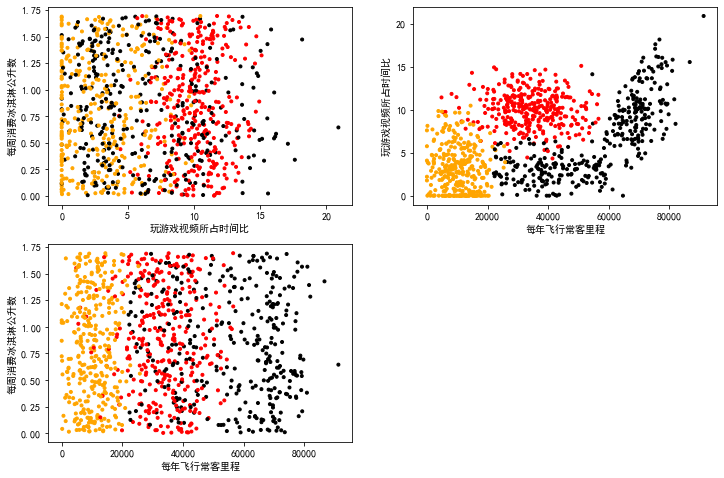

In [23]:
#绘制两两特征之间的散点图
plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 正常显示负号

pl = plt.figure(figsize=(12,8))

fig1 = pl.add_subplot(221)
plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],marker=".",c=Colors)
plt.xlabel("玩游戏视频所占时间比")
plt.ylabel("每周消费冰淇淋公升数")

fig2 = pl.add_subplot(222)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker=".",c=Colors)
plt.xlabel("每年飞行常客里程")
plt.ylabel("玩游戏视频所占时间比")

fig3 = pl.add_subplot(223)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker=".",c=Colors)
plt.xlabel("每年飞行常客里程")
plt.ylabel("每周消费冰淇淋公升数")

plt.show()

## 数据归一化

In [24]:
def minmax(dataSet):
    minDf = dataSet.min()
    maxDf = dataSet.max()
    normSet = (dataSet - minDf)/(maxDf - minDf)
    return normSet

In [25]:
datingT = pd.concat([minmax(datingTest.iloc[:,:3]),datingTest.iloc[:,3]],axis=1)

In [26]:
datingT.head()

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike


In [27]:
from sklearn.model_selection import train_test_split

In [59]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(datingT.iloc[:,:3],datingT.iloc[:,3],test_size=0.3)

In [30]:
Ytrain

641    smallDoses
727     didntLike
801    smallDoses
844     didntLike
639    largeDoses
          ...    
473    smallDoses
533    smallDoses
104    largeDoses
994    smallDoses
391     didntLike
Name: 3, Length: 700, dtype: object

In [31]:
#恢复索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [32]:
Ytrain

0      smallDoses
1       didntLike
2      smallDoses
3       didntLike
4      largeDoses
          ...    
695    smallDoses
696    smallDoses
697    largeDoses
698    smallDoses
699     didntLike
Name: 3, Length: 700, dtype: object

In [36]:
def datingClass(train,test,k):
    n = train.shape[1]-1
    m = test.shape[0]
    result=[]
    for i in range(m):
        dist = list((((train.iloc[:,:n]-test.iloc[i,:n])**2).sum(1))**0.5)
        dist_l = pd.DataFrame({"dist":dist,"labels":(train.iloc[:,n])})
        dr = dist_l.sort_values(by="dist")[:k]
        re = dr.loc[:,"labels"].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test["predict"] = result
    acc = (test.iloc[:,-1] == test.iloc[:,-2]).mean()
    print(f"模型预测准确率为{acc}")
    return test

In [41]:
n = Xtrain.shape[1]-1
m = Xtest.shape[0]

In [42]:
dist = list((((Xtrain.iloc[:,:n]-Xtest.iloc[0,:n])**2).sum(1))**0.5)
dist

[0.6295007648010391,
 0.2851275557222735,
 0.6674266715581486,
 0.10610878969544738,
 0.3074059793068622,
 0.10542909352316972,
 0.46630037431030813,
 0.4277099133787715,
 0.38683431988374567,
 0.24908639164816598,
 0.10286649871558044,
 0.026309920282715078,
 0.6006211542096116,
 0.5970472228971717,
 0.1106884596256951,
 0.2766194819471147,
 0.1897408205561204,
 0.467188323696374,
 0.7448794539464277,
 0.22592402276869056,
 0.07311547913099978,
 0.18050742925647936,
 0.30829726457884815,
 0.34777204721186517,
 0.3106682292491221,
 0.4040542364843556,
 0.335527965502226,
 0.3888827926002916,
 0.7048737967405008,
 0.43883179251974297,
 0.18910906695393662,
 0.2532572681531164,
 0.2796972239099439,
 0.42634373071416926,
 0.05965398813636296,
 0.2797935877068374,
 0.34788090669717336,
 0.7587619717016041,
 0.648099949613895,
 0.3359973137354598,
 0.4592062891425114,
 0.39175050831408537,
 0.3844217146169476,
 0.07635116478043963,
 0.2290533511241619,
 0.6836086047996407,
 0.19099706660896

In [45]:
dist_l = pd.DataFrame({"dist":dist,"labels":Ytrain})
dist_l

,dist,labels
0,0.629501,smallDoses
1,0.285128,didntLike
2,0.667427,smallDoses
3,0.106109,didntLike
4,0.307406,largeDoses
...,...,...
695,0.594864,smallDoses
696,0.576517,smallDoses
697,0.380004,largeDoses
698,0.547540,smallDoses


In [47]:
dr = dist_l.sort_values(by="dist")[:5]
dr

,dist,labels
413,0.003664,didntLike
300,0.011887,didntLike
232,0.016318,didntLike
11,0.026310,didntLike
107,0.041795,didntLike


In [48]:
re = dr.loc[:,"labels"].value_counts()
re

didntLike    5
Name: labels, dtype: int64

In [49]:
result.append(re.index[0])
result #因为前面定义了result，所以这里出现两个结果

['爱情片', 'didntLike']

In [40]:
datingClass(Xtrain,Xtest,5) #前面方法定义有误

模型预测准确率为0.0


,0,1,2,predict
0,0.690664,0.340468,0.961437,0.958241
1,0.810634,0.304529,0.217306,0.897008
2,0.469777,0.548051,0.873741,0.154833
3,0.625278,0.185406,0.812594,0.811331
4,0.147229,0.076699,0.040079,0.365734
...,...,...,...,...
295,0.065211,0.160994,0.275589,0.595925
296,0.243665,0.486131,0.979099,0.346698
297,0.082653,0.153018,0.293731,0.785277
298,0.546722,0.398402,0.971130,0.386896


=======调用sklearn库中的KNeighborsClassifier进行查看=====================================

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
KNN_classfier = KNeighborsClassifier(n_neighbors=5)

In [62]:
KNN_classfier.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [57]:
Xtrain

,0,1,2
0,0.118852,0.077215,0.054207
1,0.457277,0.176676,0.910333
2,0.033197,0.225597,0.412308
3,0.681801,0.446206,0.116246
4,0.407196,0.459397,0.083663
...,...,...,...
695,0.095998,0.325160,0.362454
696,0.194099,0.047559,0.360005
697,0.373550,0.549851,0.321030
698,0.199292,0.098902,0.253058


In [61]:
Xtest

,0,1,2
700,0.063951,0.226401,0.016947
19,0.312119,0.503293,0.769428
467,0.343366,0.388343,0.756465
682,0.163542,0.006822,0.033227
542,0.305260,0.604228,0.997277
...,...,...,...
574,0.200377,0.381548,0.548073
677,0.371895,0.507030,0.739336
519,0.625267,0.075875,0.859218
642,0.387902,0.220598,0.605508


In [63]:
y = KNN_classfier.predict(Xtest)
y

array(['smallDoses', 'largeDoses', 'largeDoses', 'smallDoses',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'smallDoses', 'smallDoses', 'didntLike', 'smallDoses', 'didntLike',
       'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'smallDoses',
       'smallDoses', 'smallDoses', 'didntLike', 'smallDoses', 'didntLike',
       'didntLike', 'didntLike', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'smallDoses', 'smallDoses', 'largeDoses',
       'smallDoses', 'largeDoses', 'smallDoses', 'didntLike', 'didntLike',
       'didntLike', 'smallDoses', 'didntLike', 'smallDoses', 'didntLike',
       'didntLike', 'largeDoses', 'smallDoses', 'didntLike', 'didntLike',
       'smallDoses', 'didntLike', 'didntLike', 'didntLike', 'largeDoses',
       'didntLike', 'largeDoses', 'didntLike', 'smallDoses', 'smallDoses',
       'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'smallDoses', 'largeDoses', 'smallDoses', 'smallDoses',
       '

In [64]:
(y == Ytest).mean()

0.9433333333333334

In [65]:
KNN_classfier.score(Xtest,Ytest)

0.9433333333333334

In [66]:
KNN_classfier.score(Xtrain,Ytrain)

0.9728571428571429

=======模仿sklearn重构KNN算法=====================================

In [82]:
import numpy as np
from math import sqrt
from collections import Counter

class kNNClassifier:
    # 定义构造函数
    def __init__(self, k):

        assert k>=1, "无效的K值"
        self.k = k
        # 加上_定义为protected变量
        self._xTrain = None
        self._yTrain = None

    # 定义fit方法
    def fit(self, xTrain, yTrain):

        self._xTrain = xTrain
        self._yTrain = yTrain
        return self

    # 定义predict方法
    def predict(self, xPredict):

        assert self._xTrain is not None and self._yTrain is not None, "请先进行Fit"
        assert xPredict.shape[1] == self._xTrain.shape[1], "特征数量与训练数据集不一致（列数不一致）"
        
        yPredict = [self._predict(x) for x in xPredict]
        return np.array(yPredict)

    def _predict(self, x):

        assert x.shape[0] == self._xTrain.shape[1], "特征数量与训练数据集不一致（列数不一致）"

        distances = [sqrt(np.sum((xTrain - x)**2)) for xTrain in self._xTrain]
        nearest = np.argsort(distances)
        topKY = [self._yTrain[i] for i in nearest[:self.k]]
        votes = Counter(topKY)

        return votes.most_common(1)[0][0]

    def __repr__(self):
        return "kNN(k=%d)" % self.k

In [97]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(datingT.iloc[:,:3],datingT.iloc[:,3],test_size=0.3)

In [98]:
type(Xtrain)

pandas.core.frame.DataFrame

In [105]:
Xtrain = np.array(Xtrain) #需要转为numpy数组形式
Ytrain = np.array(Ytrain)
type(Xtrain)

numpy.ndarray

In [89]:
knn = kNNClassifier(k=5)

In [106]:
knn.fit(Xtrain,Ytrain)

kNN(k=5)

In [107]:
Xtest.shape[1]

3

In [108]:
Xtrain.shape[1]

3

In [112]:
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

In [110]:
y2 = knn.predict(Xtest)

In [111]:
y2

array(['largeDoses', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'smallDoses', 'smallDoses', 'didntLike', 'largeDoses', 'didntLike',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'smallDoses', 'largeDoses', 'smallDoses', 'smallDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'smallDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'largeDoses',
       'smallDoses', 'smallDoses', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'largeDoses',
       'smallDoses', 'smallDoses', 'didntLike', 'smallDoses', 'didntLike',
       'didntLike', 'didntLike', 'largeDoses', 'smallDoses', 'largeDoses',
       'smallDoses', 'smallDoses', 'largeDoses', 'smallDoses',
       'didntLike', 'didntLike', 'didntLike', 'largeDoses', 'smallDoses',
       'largeDoses', 'largeDoses', 'smallDoses', 'smallDoses',
       'largeDoses', 'didntLike', 'smallDoses', 'didntLike', 'smallDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'lar

In [113]:
(y2 == Ytest).mean()

0.9433333333333334